In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
escsdata=pd.read_csv('escs_trend.csv')
escsdata.head(5)

,cycnt,cycle,cnt,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,05ARE,5,ARE,1,1,0,0.3226,82.410004,-0.351700,16.0
1,05ARE,5,ARE,1,2,0,0.0598,NaN,0.010140,16.0
2,05ARE,5,ARE,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,05ARE,5,ARE,1,4,0,0.4869,81.400002,0.725674,12.0
4,05ARE,5,ARE,1,5,0,-0.5238,63.029999,-0.105597,12.0


In [4]:
escsdata.dtypes

cycnt              object
cycle               int64
cnt                object
schoolid            int64
studentid           int64
oecd                int64
escs_trend        float64
hisei_trend       float64
homepos_trend     float64
paredint_trend    float64
dtype: object

In [3]:
escsdata.isna().sum()

cycnt                 0
cycle                 0
cnt                   0
schoolid              0
studentid             0
oecd                  0
escs_trend        34731
hisei_trend       96525
homepos_trend     28662
paredint_trend    55081
dtype: int64

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


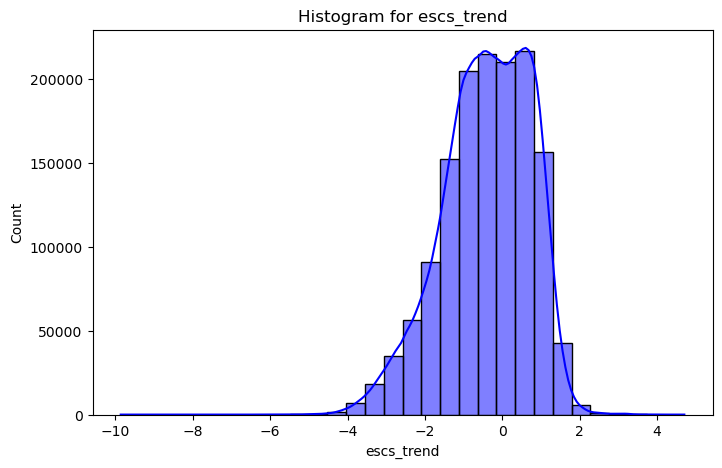

In [ ]:
#using a histogram
plt.figure(figsize=(8,5))
sb.histplot(escsdata['escs_trend'],bins=30,kde=True,color='blue')
plt.title('Histogram for escs_trend')
plt.show()

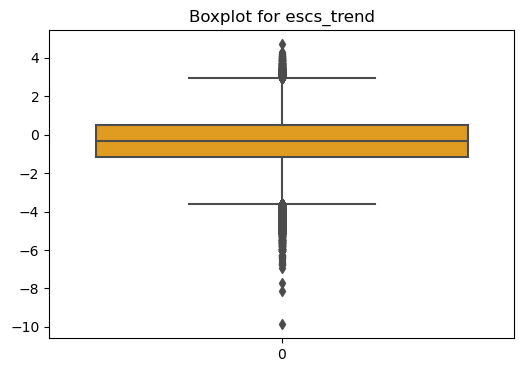

In [8]:
#using a boxplot
plt.figure(figsize=(6,4))
sb.boxplot(escsdata['escs_trend'],color='orange')
plt.title('Boxplot for escs_trend')
plt.show()

In [10]:
#separating categorical from continuous
contescs=escsdata.select_dtypes(include=['int64','float64'])
contescs

,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,NaN,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [11]:
catescs=escsdata.select_dtypes(include=['object'])
catescs

,cycnt,cnt
0,05ARE,ARE
1,05ARE,ARE
2,05ARE,ARE
3,05ARE,ARE
4,05ARE,ARE
...,...,...
1447782,07VNM,VNM
1447783,07VNM,VNM
1447784,07VNM,VNM
1447785,07VNM,VNM


In [12]:
catescs.isna().sum()

cycnt    0
cnt      0
dtype: int64

In [13]:
contescs.isna().sum()

cycle                 0
schoolid              0
studentid             0
oecd                  0
escs_trend        34731
hisei_trend       96525
homepos_trend     28662
paredint_trend    55081
dtype: int64

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


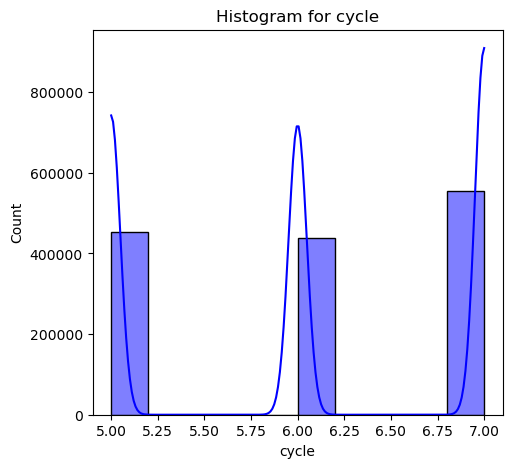

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


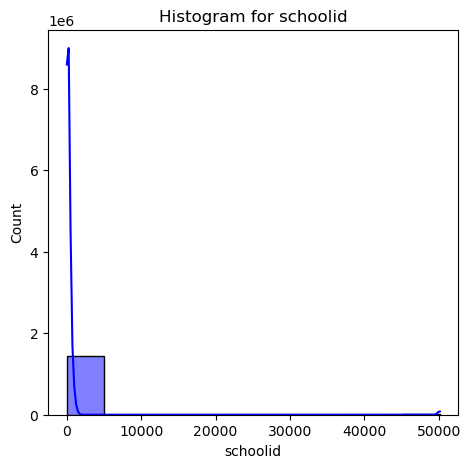

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


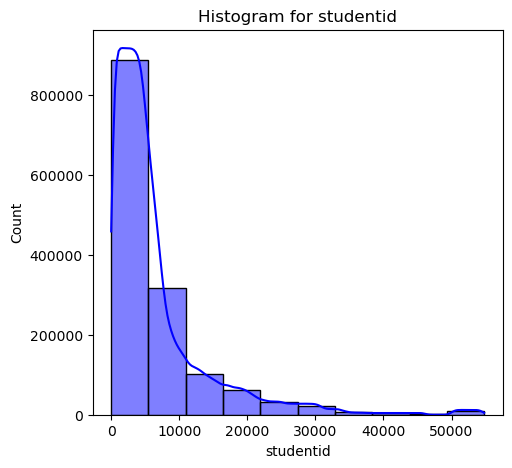

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


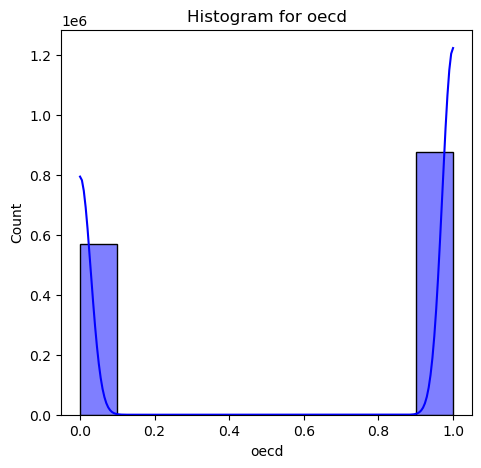

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


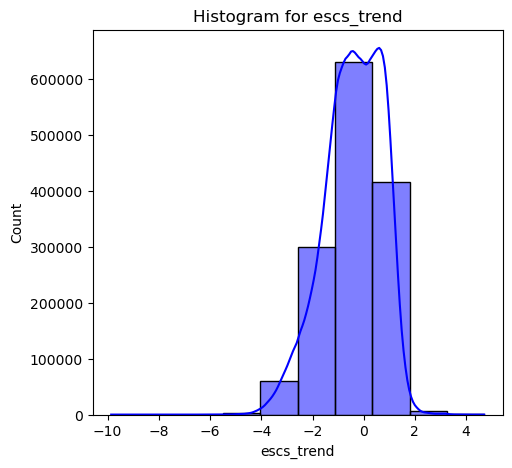

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


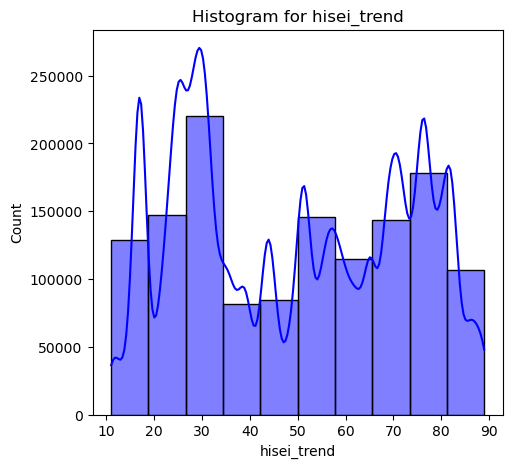

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


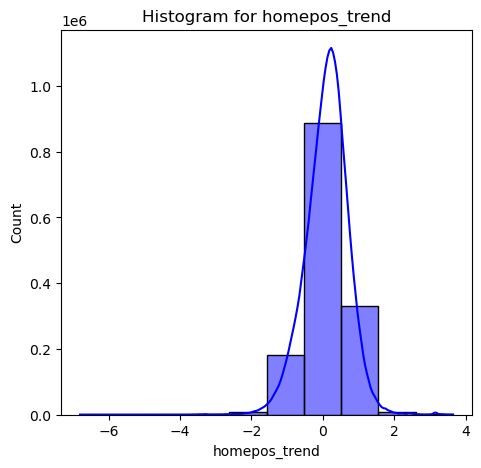

d:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


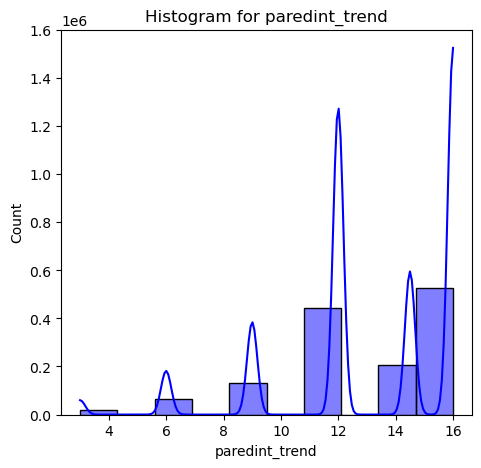

In [14]:
#using a histogram to check for skewness or normalization
for col in contescs:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    sb.histplot(contescs[col],bins=10,kde=True,color='Blue')
    plt.title(f'Histogram for {col}')
    plt.show()


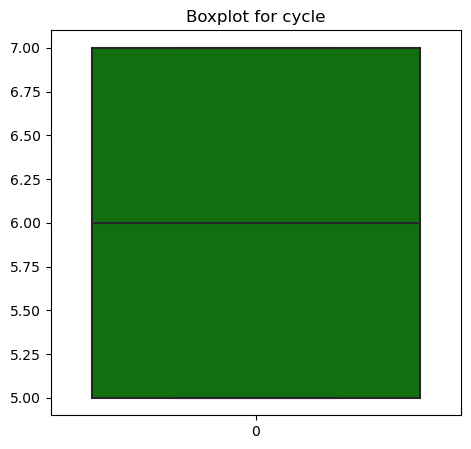

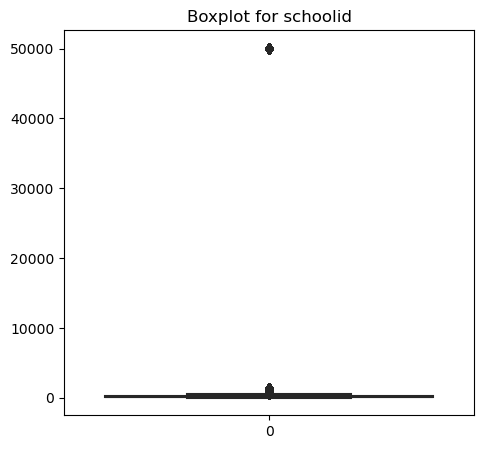

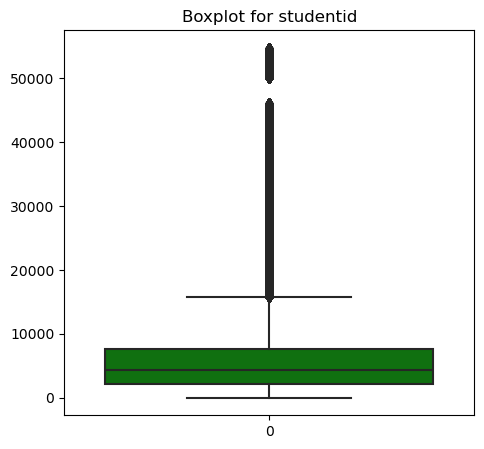

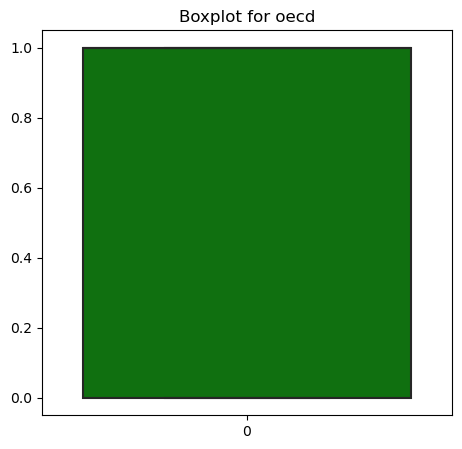

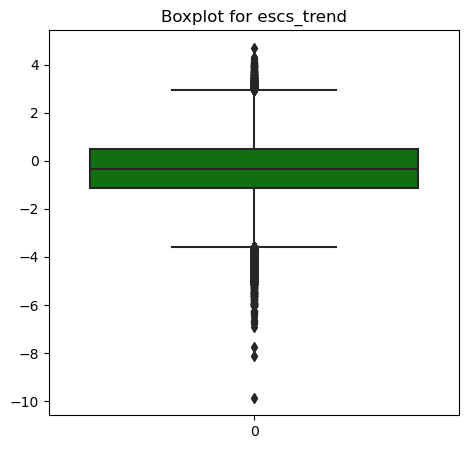

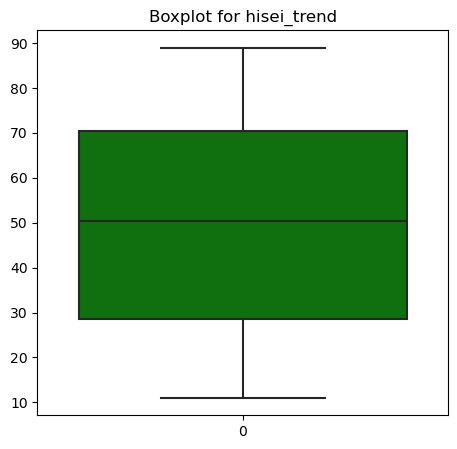

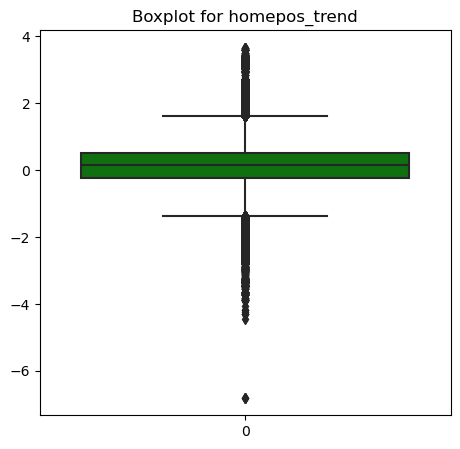

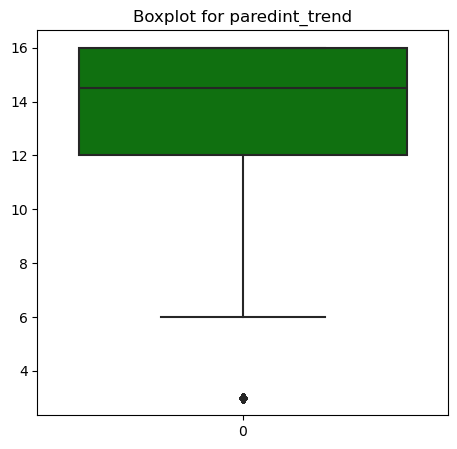

In [15]:
#using a boxplot
for col in contescs:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,2)
    sb.boxplot(contescs[col],color='green')
    plt.title(f'Boxplot for {col}')
    plt.show()

escs_trend and homepos_trend will be imputed with mean
paredint_trend and hisei_trend will be imputed with median

In [19]:
#mean imputation
contescs['escs_trend']=contescs['escs_trend'].fillna(contescs['escs_trend'].mean())
contescs['homepos_trend']=contescs['homepos_trend'].fillna(contescs['homepos_trend'].mean())
contescs


,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,NaN,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [20]:
contescs.isna().sum()

cycle                 0
schoolid              0
studentid             0
oecd                  0
escs_trend            0
hisei_trend       96525
homepos_trend         0
paredint_trend    55081
dtype: int64

In [22]:
#median imputation
contescs['hisei_trend']=contescs['hisei_trend'].fillna(contescs['hisei_trend'].median())
contescs['paredint_trend']=contescs['paredint_trend'].fillna(contescs['paredint_trend'].median())
contescs

,cycle,schoolid,studentid,oecd,escs_trend,hisei_trend,homepos_trend,paredint_trend
0,5,1,1,0,0.3226,82.410004,-0.351700,16.0
1,5,1,2,0,0.0598,50.369999,0.010140,16.0
2,5,1,3,0,-0.8984,51.500000,-0.302142,12.0
3,5,1,4,0,0.4869,81.400002,0.725674,12.0
4,5,1,5,0,-0.5238,63.029999,-0.105597,12.0
...,...,...,...,...,...,...,...,...
1447782,7,152,5094,0,-2.0618,51.560001,-0.488860,6.0
1447783,7,152,5205,0,-1.0211,51.560001,-0.457206,12.0
1447784,7,152,5219,0,-3.0736,27.910000,-1.196708,6.0
1447785,7,152,5253,0,-1.7683,33.759998,-0.972096,12.0


In [23]:
contescs.isna().sum()

cycle             0
schoolid          0
studentid         0
oecd              0
escs_trend        0
hisei_trend       0
homepos_trend     0
paredint_trend    0
dtype: int64